In [2]:
# allow inline plots
%matplotlib notebook

# importing necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans as kmeans
markers_list = ['o', 's', 'd', '^', 'x', '+', '*', 'h', 'v', '<', '>'
                , '1', '2', '3', '4', '8', 'H', 'D', 'p', '|', 'o', '_', ',']

# reading in the CSV data

data = pd.read_csv('ClusterSet1.txt', delim_whitespace=True, header = None)
X = data.values

def create_kmeans(clusters, X) :
    k = kmeans(n_clusters=CLUSTERS)
    k.fit(X)
    return k

CLUSTERS = 11
k = create_kmeans(CLUSTERS, X)

In [3]:

def plot_graph(kmeans_cluster, X) :
    cluster_labels = kmeans_cluster.labels_
    n_clusters = max(cluster_labels) + 1
    
    ax = Axes3D(plt.figure())
    ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('X1'); ax.set_ylabel('X2'); ax.set_zlabel('X3')

    for label in range(n_clusters):
        X_label = X[cluster_labels == label]
        ax.scatter(X_label[:,0], X_label[:,1], X_label[:, 2], label = str(label)
                   , marker = markers_list[label])
    ax.legend()

<IPython.core.display.Javascript object>


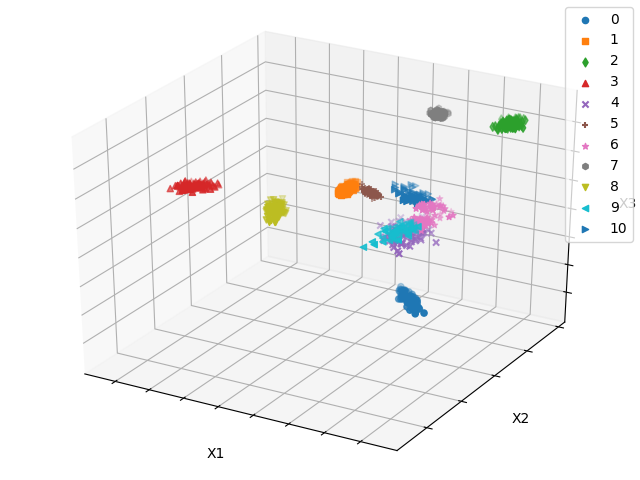

In [4]:
plot_graph(k, X)

In [5]:
def plot_line(X, Y) :
    print(X)
    print(Y)
    plt.plot(X, Y)
    plt.ylabel('distortion')
    plt.xlabel('cluster count')
    plt.show()

<IPython.core.display.Javascript object>


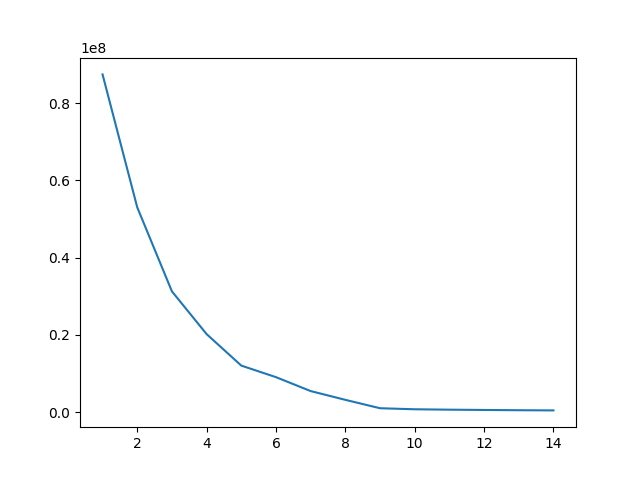

In [6]:
losses = []
for n_clusters in range(1, 15):
    losses.append(kmeans(n_clusters = n_clusters).fit(X).inertia_)

ax = plt.subplots()[1]
ax.plot(range(1, len(losses) + 1), losses)